In [1]:
# Import the dependncies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of ranfom latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f042a66e4fc943f36e6796902f729a9c


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | roches noires
City not found. Skipping...
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | mahon
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | marsh harbour
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | olive branch
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | cukai
Processing Record 13 of Set 1 | rio gallegos
Processing Record 14 of Set 1 | cedar lake
Processing Record 15 of Set 1 | saint-georges
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | dakar
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | ribeira grande
Processing Record 2

Processing Record 34 of Set 4 | rapid valley
Processing Record 35 of Set 4 | calamar
Processing Record 36 of Set 4 | necochea
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | leningradskiy
Processing Record 39 of Set 4 | hurghada
Processing Record 40 of Set 4 | rabaul
Processing Record 41 of Set 4 | panaba
Processing Record 42 of Set 4 | bakchar
Processing Record 43 of Set 4 | aquiraz
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | tura
Processing Record 48 of Set 4 | terney
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | nanortalik
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 5 | sultanpur
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | souillac
Processing Rec

Processing Record 19 of Set 8 | sibolga
Processing Record 20 of Set 8 | jiazi
Processing Record 21 of Set 8 | kargat
Processing Record 22 of Set 8 | kasungu
Processing Record 23 of Set 8 | buala
Processing Record 24 of Set 8 | tungkang
City not found. Skipping...
Processing Record 25 of Set 8 | mujiayingzi
Processing Record 26 of Set 8 | akureyri
Processing Record 27 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 8 | sao joao da barra
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | pyu
Processing Record 31 of Set 8 | koumac
Processing Record 32 of Set 8 | sinnar
Processing Record 33 of Set 8 | marsa matruh
Processing Record 34 of Set 8 | kyzyl
Processing Record 35 of Set 8 | masuguru
Processing Record 36 of Set 8 | yerbogachen
Processing Record 37 of Set 8 | ngunguru
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | shenzhen
Processing Record 40 of Set 8 | rokytne
Processing Record 41 of Set 8 | nefteyugansk
Processing Reco

Processing Record 11 of Set 12 | waddan
Processing Record 12 of Set 12 | sembakung
Processing Record 13 of Set 12 | ciudad del maiz
Processing Record 14 of Set 12 | plettenberg bay
Processing Record 15 of Set 12 | constitucion
Processing Record 16 of Set 12 | orocue
Processing Record 17 of Set 12 | virginia beach
Processing Record 18 of Set 12 | okato
Processing Record 19 of Set 12 | novosemeykino
Processing Record 20 of Set 12 | krk
Processing Record 21 of Set 12 | teya
Processing Record 22 of Set 12 | sulangan
Processing Record 23 of Set 12 | thunder bay
Processing Record 24 of Set 12 | buon me thuot
City not found. Skipping...
Processing Record 25 of Set 12 | recco
Processing Record 26 of Set 12 | kyzyl-suu
Processing Record 27 of Set 12 | naigarhi
Processing Record 28 of Set 12 | gasa
Processing Record 29 of Set 12 | santa cruz
Processing Record 30 of Set 12 | kathmandu
Processing Record 31 of Set 12 | wattegama
Processing Record 32 of Set 12 | cootamundra
Processing Record 33 of S

In [15]:
len(city_data)

554

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,73.40,64,1,6.93,US,2020-05-25 01:59:58
1,Port Alfred,-33.59,26.89,57.00,87,97,7.92,ZA,2020-05-25 01:59:58
2,Yellowknife,62.46,-114.35,46.40,45,20,10.29,CA,2020-05-25 01:59:58
3,Mahon,39.89,4.27,59.00,67,0,4.70,ES,2020-05-25 01:59:58
4,Marsh Harbour,26.54,-77.06,77.76,76,100,16.62,BS,2020-05-25 01:59:59
5,Bilma,18.69,12.92,87.80,21,59,6.31,NE,2020-05-25 01:59:59
6,Olive Branch,34.96,-89.83,82.40,74,40,5.84,US,2020-05-25 01:59:59
7,Hobart,-42.88,147.33,50.00,66,75,8.05,AU,2020-05-25 02:00:00
8,Cukai,4.25,103.42,86.00,84,20,3.36,MY,2020-05-25 02:00:00
9,Rio Gallegos,-51.62,-69.22,47.10,63,100,29.84,AR,2020-05-25 01:57:11


In [19]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-05-25 01:59:58,42.10,-79.24,73.40,64,1,6.93
1,Port Alfred,ZA,2020-05-25 01:59:58,-33.59,26.89,57.00,87,97,7.92
2,Yellowknife,CA,2020-05-25 01:59:58,62.46,-114.35,46.40,45,20,10.29
3,Mahon,ES,2020-05-25 01:59:58,39.89,4.27,59.00,67,0,4.70
4,Marsh Harbour,BS,2020-05-25 01:59:59,26.54,-77.06,77.76,76,100,16.62
5,Bilma,NE,2020-05-25 01:59:59,18.69,12.92,87.80,21,59,6.31
6,Olive Branch,US,2020-05-25 01:59:59,34.96,-89.83,82.40,74,40,5.84
7,Hobart,AU,2020-05-25 02:00:00,-42.88,147.33,50.00,66,75,8.05
8,Cukai,MY,2020-05-25 02:00:00,4.25,103.42,86.00,84,20,3.36
9,Rio Gallegos,AR,2020-05-25 01:57:11,-51.62,-69.22,47.10,63,100,29.84


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/25/20'

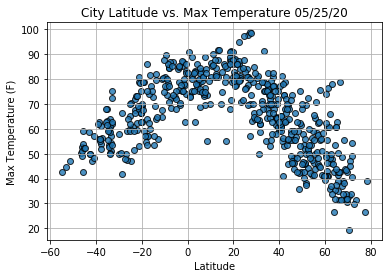

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

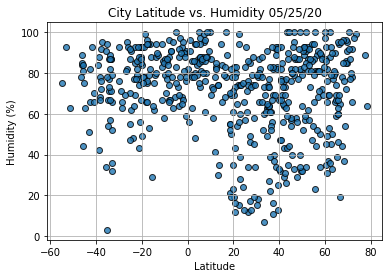

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

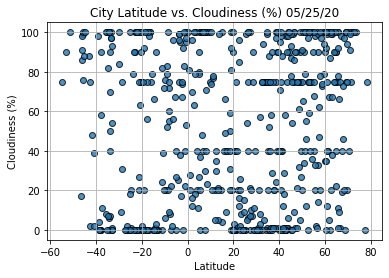

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

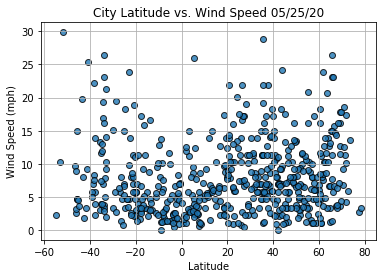

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()